   UNNAMED:_0  ROUTENO ROUTE_DESCRIPTION     RAWDATE FORMATTEDDATE   SKU  \
0      565301      767      767 LONGMONT  2023-06-26    2023-06-26  6125   
1      564254      756        756 ARVADA  2023-06-26    2023-06-26  6125   
2      564255      756        756 ARVADA  2023-06-26    2023-06-26  4120   
3      564256      756        756 ARVADA  2023-06-26    2023-06-26  4100   
4      564257      756        756 ARVADA  2023-06-26    2023-06-26  4120   

  SKU_DESCRIPTION                     RETAILER CUSTOMER_ACCT  \
0    EM SOURDOUGH                 KING SOOPERS     1102-0105   
1    EM SOURDOUGH                 KING SOOPERS     1102-0003   
2    THIN RM SOUR  SPROUTS FARMERS MARKET (CO)     1971-0301   
3   THIN 100% WHT                 SAFEWAY (CO)     1901-1998   
4    THIN RM SOUR  SPROUTS FARMERS MARKET (CO)     1984-0008   

            STORE_ADDRESS  ... GROSS_DOLLARS RETURN_DOLLARS  \
0     6110 firestone blvd  ...         18.16           0.00   
1      6350 sheridan blvd  ...  

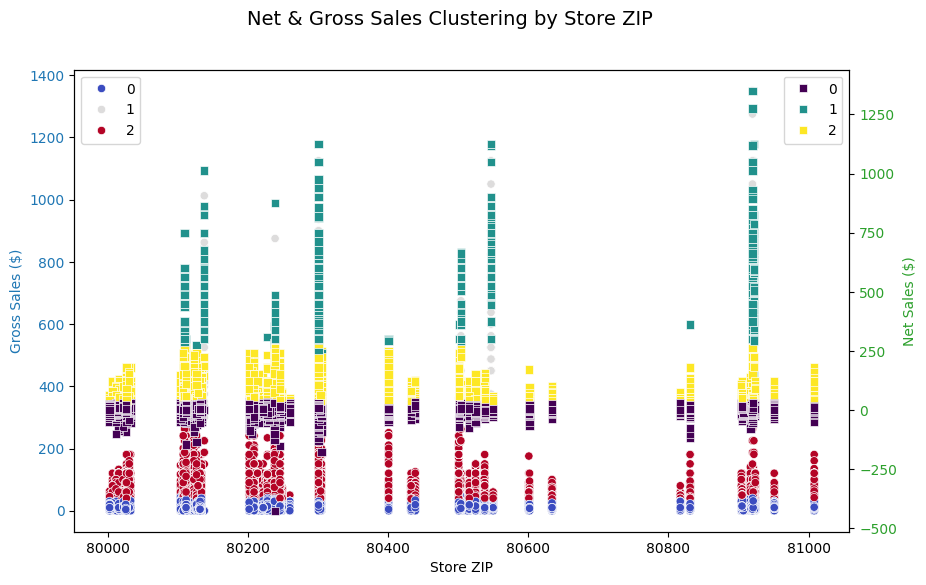

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load Dataset
file_path = "train.csv"  # Change to "train.csv" if using CSV
df = pd.read_csv(file_path)

# Debugging: Check if data is loaded correctly
print(df.head())
print(df.info())

# Fix ZIP Code Formatting
df["STORE_ZIP"] = df["STORE_ZIP"].astype(str).str.zfill(5)  # Ensure 5-digit ZIP codes
df["STORE_ZIP"] = df["STORE_ZIP"].str.extract(r'(\d{5})')  # Extract valid ZIP codes
df["STORE_ZIP"] = pd.to_numeric(df["STORE_ZIP"], errors='coerce')  # Convert to numeric
df = df.dropna()  # Remove any NaN values

# Select Relevant Columns (Net & Gross Sales)
df_cluster = df[["STORE_ZIP", "NET_AFTER_RETURN_DOLLARS", "GROSS_DOLLARS"]].dropna()

# Standardize Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster[["NET_AFTER_RETURN_DOLLARS", "GROSS_DOLLARS"]])

# Apply K-Means Clustering
k = 3  # Adjust based on data patterns
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_cluster["Cluster"] = kmeans.fit_predict(df_scaled)

# Check if clustering is working
print(df_cluster["Cluster"].value_counts())

# Create Dual Y-Axis Scatter Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Gross Sales on left Y-axis
ax1.set_xlabel("Store ZIP")
ax1.set_ylabel("Gross Sales ($)", color="tab:blue")
sns.scatterplot(x=df_cluster["STORE_ZIP"], y=df_cluster["GROSS_DOLLARS"], hue=df_cluster["Cluster"], palette='coolwarm', ax=ax1)
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Create a second Y-axis for Net Sales
ax2 = ax1.twinx()
ax2.set_ylabel("Net Sales ($)", color="tab:green")
sns.scatterplot(x=df_cluster["STORE_ZIP"], y=df_cluster["NET_AFTER_RETURN_DOLLARS"], hue=df_cluster["Cluster"], palette='viridis', ax=ax2, marker="s")
ax2.tick_params(axis='y', labelcolor="tab:green")

# Title and Legends
fig.suptitle("Net & Gross Sales Clustering by Store ZIP", fontsize=14)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show(block=True)
